In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
datafile = "/Users/yunlin1207/Downloads/diabetes.csv"
df = pd.read_csv(datafile)

In [579]:
#Data Cleaning

In [580]:
df.shape

(768, 9)

In [581]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [582]:
# use count to find the null value - here finds none
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [584]:
#Consider data constraint
#if value could be zero or negative - Glucose/BloodPressure/SkinThickness/Insulin/BMI can't be zero or below zero
#Replace these zero with NaN
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)
df['BMI'] = df['BMI'].replace(0,np.nan)
df.isna().sum()
#Replace NaN with the median of that column
df.fillna(df.median(), inplace = True)

In [585]:
df.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.656250  30.438286  44.000   99.75000   
BloodPressure             768.0   72.386719  12.096642  24.000   64.00000   
SkinThickness             768.0   29.108073   8.791221   7.000   25.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   32.00000   99.00  
Insulin                   125.0000  127.25000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [586]:
#Define the categorical variable
#Outcome
#BMI_Class
#if_Pregnancy

In [587]:
# Convert Outcome to category variable
df['Outcome']= df.Outcome.astype('category')
df['Outcome'].unique()
df.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [588]:
# Add one column to show the BMI_Class category
# Underweight = <18.5
# Normal weight = 18.5–24.9 
# Overweight = 25–29.9 
# Obesity = BMI of 30 or greater
df['BMI_Class'] = pd.cut(df.BMI,bins=[0,18.5,24.9,29.9,float('Inf')],labels=['Underweight','Normal weight','Overweight','Obesity'])
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age Outcome      BMI_Class  
0                     0.627   50       1        Obesity  
1                     0.351   31       0     Overweight  
2                     0.672   32       1  Normal weight  
3                     0.167   21       0     Overweight  
4                     2.288   33       1        Obesity

In [590]:
#Add one column to show the PregnancyTime category
#A:<=0 times
#B:>0 and <=2 times
#C:>2 times
df['if_Pregnancy'] = pd.cut(df.Pregnancies,bins=[-1,0,2,99999],labels=['A','B','C'])
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age Outcome      BMI_Class if_Pregnancy  
0                     0.627   50       1        Obesity            C  
1                     0.351   31       0     Overweight            B  
2                     0.672   32       1  Normal weight            C  
3                     0.167   21       0     Overweight            B  
4                     2.288   33       1        Obesity            A

In [591]:
#Exploratory Data Analysis

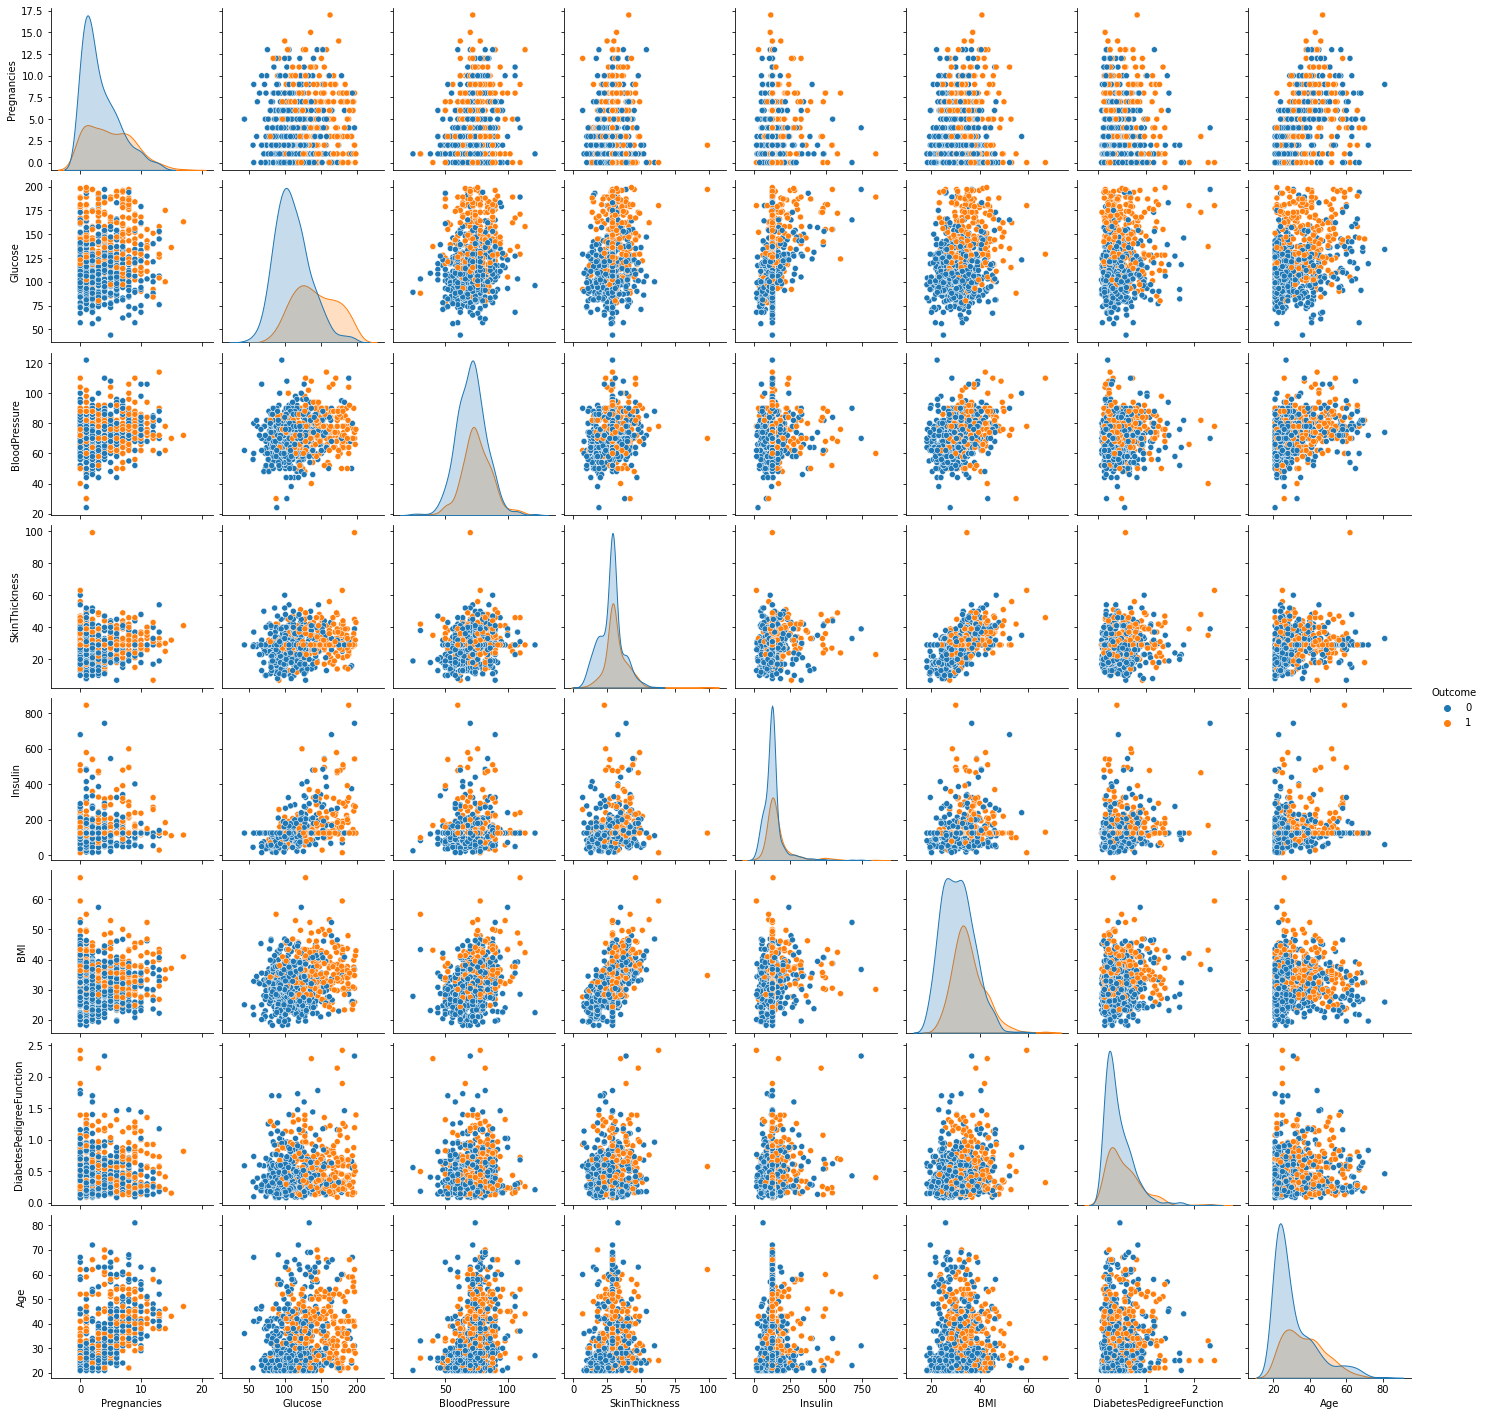

In [592]:
#check distribution and correlation of each continuous variable group by outcome
sns.pairplot(df, hue='Outcome')

<AxesSubplot:title={'center':'Age'}, xlabel='Outcome'>

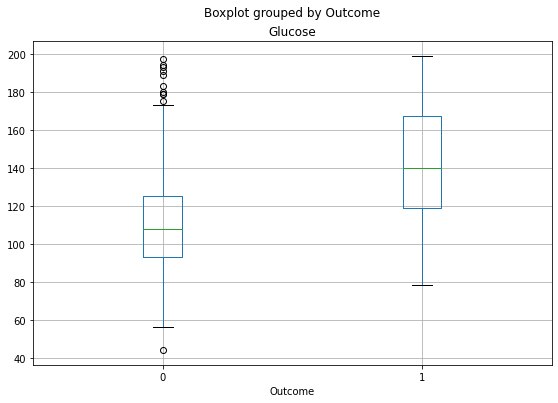

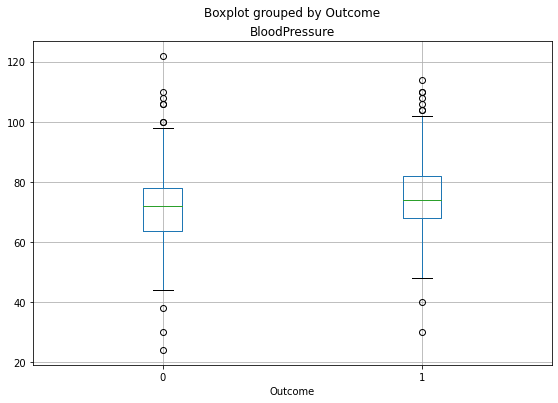

In [593]:
sns.boxplot(x='Outcome',y='Pregnancies',data=df)
df.boxplot('Pregnancies', by='Outcome', figsize=(9, 6))
df.boxplot('Glucose', by='Outcome', figsize=(9, 6))
df.boxplot('BloodPressure', by='Outcome', figsize=(9, 6))
df.boxplot('SkinThickness', by='Outcome', figsize=(9, 6))
df.boxplot('Insulin', by='Outcome', figsize=(9, 6))
#non-diabetes BMI meadian generally is less than diabetes
df.boxplot('BMI', by='Outcome', figsize=(9, 6))
df.boxplot('DiabetesPedigreeFunction', by='Outcome', figsize=(9, 6))
df.boxplot('Age', by='Outcome', figsize=(9, 6))

In [594]:
# Create the dataset without outliers


In [595]:
# Research Question:
# Analysis the average BMI of people based on with or without diabetes
# Analysis the mean glucose of people in different BMI classes
# If the possible diabete outcomes impact on BMI/Glucose/Blood Pressure/Skin Thickness; 
# If the combination of diabete outcomes and BMI/Blood Pressure/Skin Thickness impact on if_Pregnancy/Glucose; 

In [596]:
#Two Sample T-test
# a is the group with diabetes
# b is the group without diabetes
# H0:μa <= μb The average BMI of people with diabetes is less or eqal than the average age of people without diabetes
# H1:μa > μb  The average BMI of people with diabetes is greater than the average age of people without diabetes
a = df.loc[df['Outcome'] == 1]['BMI']
b = df.loc[df['Outcome'] == 0]['BMI']
a.count()
b.count()
#a = a.sample(268)
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
#P-value <= 0.05, reject H0
#Women with diabetes have higher average BMI

P-Value:2.552895685742694e-18 T-Statistic:9.051746949833985


In [597]:
#Two Sample T-test
# a is the group with diabetes
# b is the group without diabetes
# H0:μa <= μb The average BloodPressure of people with diabetes is less or eqal than the average age of people without diabetes
# H1:μa > μb  The average BloodPressure of people with diabetes is greater than the average age of people without diabetes
a = df.loc[df['Outcome'] == 1]['BloodPressure']
b = df.loc[df['Outcome'] == 0]['BloodPressure']
a.count()
b.count()
#a = a.sample(268)
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 
#P-value <= 0.05, reject H0
#Women with diabetes have higher average BloodPressure

P-Value:4.2016769212674544e-06 T-Statistic:4.648351130863798


In [598]:
#Two Sample T-test
# a is the group with diabetes
# b is the group without diabetes
# H0:μa <= μb The average SkinThickness of people with diabetes is less or eqal than the average age of people without diabetes
# H1:μa > μb  The average SkinThickness of people with diabetes is greater than the average age of people without diabetes
a = df.loc[df['Outcome'] == 1]['SkinThickness']
b = df.loc[df['Outcome'] == 0]['SkinThickness']
a.count()
b.count()
#a = a.sample(268)
tStat, pValue = stats.ttest_ind(a, b, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
#P-value <= 0.05, reject H0
#Women with diabetes have higher average SkinThickness

P-Value:2.471958498912807e-09 T-Statistic:6.065718453761241


In [599]:
#Two Sample T-test for DiabetesPedigreeFunction
# a is the group with diabetes
# b is the group without diabetes
# H0:μa <= μb The average DiabetesPedigreeFunction of people with diabetes is less or eqal than the average age of people without diabetes
# H1:μa > μb  The average DiabetesPedigreeFunction of people with diabetes is greater than the average age of people without diabetes
a = df.loc[df['Outcome'] == 1]['DiabetesPedigreeFunction']
b = df.loc[df['Outcome'] == 0]['DiabetesPedigreeFunction']
a.count()
b.count()
#a = a.sample(268)
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 
#P-value <= 0.05, reject H0
#Women with diabetes have higher average DiabetesPedigreeFunction

P-Value:6.1004814242403285e-06 T-Statistic:4.576812008291278


In [600]:
# One-way ANOVA
# Class Underweight has too few data to conduct the test
# a is Glucose under Normal Weight BMI class with diabetes
# b is Glucose under Overweight BMI class with diabetes
# c is Glucose under Obesity BMI class with diabetes
# H0:μa=μb=μc=μd
# H1:at least one of μa,μb,μc is not equal to each other
BMI_withDiabetes = df.loc[(df['Outcome'] == 1) & (df['BMI_Class'] != 'Underweight')]
BMI_withDiabetes.groupby(['BMI_Class']).mean().Glucose
sns.boxplot(x='BMI_Class',y='Glucose',data=BMI_withDiabetes)

model1 = ols('Glucose ~ BMI_Class', BMI_withDiabetes).fit()
aov_table1 = sm.stats.anova_lm(model1)
print(aov_table1)
#P value is 0.049158 and it is less than aplha(0.05), reject the null hypothesis

              df         sum_sq      mean_sq         F    PR(>F)
BMI_Class    3.0    6805.256615  2268.418872  2.651647  0.049158
Residual   265.0  226701.015643   855.475531       NaN       NaN


In [601]:
#post hoc corrections (Bonferroni)
pair_t = model1.t_test_pairwise('BMI_Class')
pair_t.result_frame

coef    std err          t         P>|t|  \
Normal weight-Underweight  49.432644   8.385832   5.894781  1.137559e-08   
Overweight-Underweight     23.261215   4.462088   5.213078  3.742360e-07   
Obesity-Underweight        35.444926   3.339499  10.613846  3.664292e-22   
Overweight-Normal weight  -26.171429  11.983225  -2.184005  2.983868e-02   
Obesity-Normal weight     -13.987718  11.228612  -1.245721  2.139671e-01   
Obesity-Overweight         12.183710   5.025716   2.424274  1.600847e-02   

                           Conf. Int. Low  Conf. Int. Upp.     pvalue-hs  \
Normal weight-Underweight       32.921307        65.943981  5.687793e-08   
Overweight-Underweight          14.475558        32.046872  1.496943e-06   
Obesity-Underweight             28.869598        42.020253  2.198575e-21   
Overweight-Normal weight       -49.765874        -2.576983  5.878702e-02   
Obesity-Normal weight          -36.096364         8.120927  2.139671e-01   
Obesity-Overweight               2.288296        22.079125  4.726071e-02   

                           reject-hs  
Normal weight-Underweight       True  
Overweight-Underweight          True  
Obesity-Underweight             True  
Overweight-Normal weight       False  
Obesity-Normal weight          False  
Obesity-Overweight              True

              df         sum_sq      mean_sq         F    PR(>F)
BMI_Class    3.0    4335.542516  1445.180839  2.387162  0.068248
Residual   496.0  300276.895484   605.396967       NaN       NaN


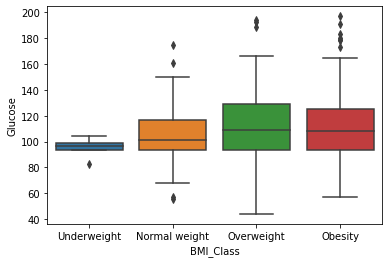

In [602]:
# One-way ANOVA
# a is Glucose under Underweight BMI class without diabetes
# b is Glucose under Normal Weight BMI class without diabetes
# c is Glucose under Overweight BMI class without diabetes
# d is Glucose under Obesity BMI class without diabetes
# H0:μa=μb=μc=μd
# H1:at least one of μa,μb,μc is not equal to each other
BMI_woDiabetes = df.loc[(df['Outcome'] == 0)]
BMI_woDiabetes.groupby(['BMI_Class']).mean().Glucose
sns.boxplot(x='BMI_Class',y='Glucose',data=BMI_woDiabetes)

model2 = ols('Glucose ~ BMI_Class', BMI_woDiabetes).fit()
aov_table2 = sm.stats.anova_lm(model2,typ=1)
print(aov_table2)
#P value is 0.068248 and it is greater than aplha(0.05), failed to reject the null hypothesis

In [603]:
#post hoc corrections (Bonferroni)
pair_t = model2.t_test_pairwise('BMI_Class')
pair_t.result_frame

coef    std err         t     P>|t|  \
Normal weight-Underweight  10.307895  12.558736  0.820775  0.412169   
Overweight-Underweight     17.606115  12.478166  1.410954  0.158885   
Obesity-Underweight        16.372137  12.395964  1.320764  0.187189   
Overweight-Normal weight    7.298220   3.275359  2.228220  0.026313   
Obesity-Normal weight       6.064243   2.946740  2.057950  0.040117   
Obesity-Overweight         -1.233978   2.581869 -0.477940  0.632904   

                           Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  \
Normal weight-Underweight      -14.366985        34.982775   0.654454   
Overweight-Underweight          -6.910464        42.122694   0.499480   
Obesity-Underweight             -7.982935        40.727210   0.499480   
Overweight-Normal weight         0.862933        13.733508   0.147852   
Obesity-Normal weight            0.274611        11.853874   0.185124   
Obesity-Overweight              -6.306727         3.838771   0.654454   

                           reject-hs  
Normal weight-Underweight      False  
Overweight-Underweight         False  
Obesity-Underweight            False  
Overweight-Normal weight       False  
Obesity-Normal weight          False  
Obesity-Overweight             False

In [605]:
#Two-way ANOVA
dftwoway = df[['Glucose', 'Outcome','if_Pregnancy']]
dftwoway
#sns.boxplot(x="Outcome", y="Glucose", hue="if_Pregnancy", data=dftwoway) 

Glucose Outcome if_Pregnancy
0      148.0       1            C
1       85.0       0            B
2      183.0       1            C
3       89.0       0            B
4      137.0       1            A
..       ...     ...          ...
763    101.0       0            C
764    122.0       0            B
765    121.0       0            C
766    126.0       1            B
767     93.0       0            B

[768 rows x 3 columns]

In [606]:
model4 = ols('Glucose ~ C(if_Pregnancy) + C(Outcome) + C(if_Pregnancy):C(Outcome)', data=dftwoway).fit()
anova_table4 = sm.stats.anova_lm(model4, typ=2)
print(anova_table4)
#The p value from ANOVA for if_Pregnancies, Outcome and C(if_Pregnancies):C(Outcome) are statistically significant. 
#if_Pregnancies significantly affects the Glucose result (p<0.05)
#Outcome significantly affects the Glucose result (p<0.05)
#and C(if_Pregnancies):C(Outcome) does not significantly affects the Glucose result (p>0.05)

                                   sum_sq     df           F        PR(>F)
C(if_Pregnancy)               4794.912822    2.0    3.431958  3.282408e-02
C(Outcome)                  152933.009717    1.0  218.923534  9.917113e-44
C(if_Pregnancy):C(Outcome)     951.017900    2.0    0.680691  5.065747e-01
Residual                    532308.936382  762.0         NaN           NaN


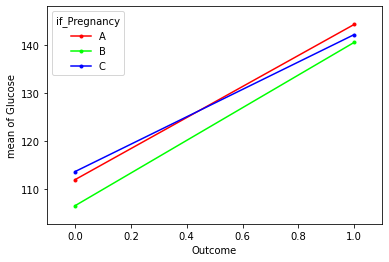

In [607]:
#interaction plot
fig = interaction_plot(x=dftwoway['Outcome'], trace=dftwoway['if_Pregnancy'], response=dftwoway['Glucose'])
plt.show()

In [608]:
#for if_Pregnancies
res = stat()
res.tukey_hsd(df=dftwoway, res_var='Glucose', xfac_var='if_Pregnancy', anova_model='Glucose ~ C(if_Pregnancy) + C(Outcome) + C(if_Pregnancy):C(Outcome)')
res.tukey_summary

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1 group2       Diff     Lower      Upper   q-value   p-value
0      C      B  12.624235  7.586267  17.662203  8.322015  0.001000
1      C      A   3.002387 -3.623403   9.628176  1.504901  0.535037
2      B      A   9.621849  2.487884  16.755813  4.479261  0.004556

In [609]:
#for Outcome
res = stat()
res.tukey_hsd(df=dftwoway, res_var='Glucose', xfac_var='Outcome', anova_model='Glucose ~ C(if_Pregnancy) + C(Outcome) + C(if_Pregnancy):C(Outcome)')
res.tukey_summary

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1  group2       Diff      Lower      Upper    q-value  p-value
0       1       0  31.448597  27.520601  35.376593  22.227144    0.001

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

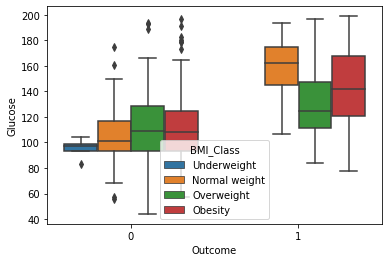

In [610]:
#Two-way ANOVA 
dftwoway = df[['Glucose', 'BMI_Class', 'Outcome']]
dftwoway.head()
sns.boxplot(x="Outcome", y="Glucose", hue="BMI_Class", data=dftwoway) 

In [611]:
model3 = ols('Glucose ~ C(BMI_Class) + C(Outcome) + C(BMI_Class):C(Outcome)', data=dftwoway).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
print(anova_table3)
#The p value from ANOVA for BMI_Class and C(BMI_Class):C(Outcome) are statistically significant (p<0.05). 
#BMI_Class significantly affects the Glucose result
#and C(BMI_Class):C(Outcome) significantly affects the Glucose result

                               sum_sq     df             F        PR(>F)
C(BMI_Class)             3.285748e+04    3.0  1.581631e+01  5.511315e-10
C(Outcome)              -8.285664e-09    1.0 -1.196519e-11  1.000000e+00
C(BMI_Class):C(Outcome)  1.507819e+05    3.0  7.258052e+01  2.731161e-41
Residual                 5.269779e+05  761.0           NaN           NaN


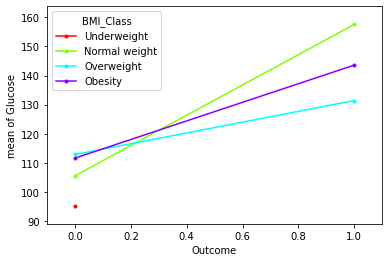

In [612]:
#interaction plot
fig = interaction_plot(x=dftwoway['Outcome'], trace=dftwoway['BMI_Class'], response=dftwoway['Glucose'])
plt.show()

In [613]:
#for BMI_Class
res = stat()
res.tukey_hsd(df=dftwoway, res_var='Glucose', xfac_var='BMI_Class', anova_model='Glucose ~ C(BMI_Class) + C(Outcome) + C(BMI_Class):C(Outcome)')
res.tukey_summary

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1         group2       Diff      Lower      Upper   q-value  \
0        Obesity     Overweight   9.246377   3.317560  15.175194  5.678764   
1        Obesity  Normal weight  17.118926   9.735747  24.502105  8.442739   
2        Obesity    Underweight  30.996377  -3.020939  65.013692  3.317883   
3     Overweight  Normal weight   7.872549  -0.532992  16.278090  3.410358   
4     Overweight    Underweight  21.750000 -12.503752  56.003752  2.312072   
5  Normal weight    Underweight  13.877451 -20.657749  48.412650  1.463181   

    p-value  
0  0.001000  
1  0.001000  
2  0.088612  
3  0.075891  
4  0.360211  
5  0.704603

In [614]:
#for C(BMI_Class):C(Outcome)
res.tukey_hsd(df=dftwoway, res_var='Glucose', xfac_var=['BMI_Class','Outcome'], anova_model='Glucose ~ C(BMI_Class) + C(Outcome) + C(BMI_Class):C(Outcome)')
res.tukey_summary.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:369: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:862: RuntimeWarning: divide by zero encountered in true_divide
  mse_factor = np.sqrt(np.divide(mse, group1_count) + np.divide(mse, group2_count))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:870: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, group2_count)))))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:873: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, group2_


NaN result encountered.

NaN result encountered.

NaN result encountered.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:869: RuntimeWarning: divide by zero encountered in true_divide
  (np.divide(1, group1_count) +
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:872: RuntimeWarning: divide by zero encountered in true_divide
  (np.divide(1, group1_count) +


group1              group2       Diff      Lower      Upper  \
0  (Obesity, 1)        (Obesity, 0)  31.961573  24.656745  39.266401   
1  (Obesity, 1)     (Overweight, 1)  12.183710  -1.559155  25.926576   
2  (Obesity, 1)     (Overweight, 0)  30.727595  22.069330  39.385861   
3  (Obesity, 1)  (Normal weight, 1)  13.987718 -16.717024  44.692460   
4  (Obesity, 1)  (Normal weight, 0)  38.025816  28.213562  47.838070   

     q-value   p-value  
0  18.806695  0.001000  
1   3.810628  0.125276  
2  15.254289  0.001000  
3   1.958104  0.851109  
4  16.657279  0.001000

In [615]:
#MLR
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age Outcome      BMI_Class if_Pregnancy  
0                     0.627   50       1        Obesity            C  
1                     0.351   31       0     Overweight            B  
2                     0.672   32       1  Normal weight            C  
3                     0.167   21       0     Overweight            B  
4                     2.288   33       1        Obesity            A

In [618]:
#x = df[['Pregnancies', 'Outcome', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
#y = df['Glucose']
#MAE: 20.93103363904927
#MSE: 721.8655130117493
#RMSE: 26.86755502482035

#x = df[['Pregnancies', 'Outcome', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
#y = df['BloodPressure']
#MAE: 8.49730310224963
#MSE: 126.25735546906938
#RMSE: 11.23642983643245

#x = df[['Pregnancies', 'Outcome', 'BloodPressure', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
#y = df['SkinThickness']
#MAE: 5.694642421471612
#MSE: 51.87292375792265
#RMSE: 7.20228600917255


#x = df[['Pregnancies', 'Outcome', 'BloodPressure', 'Glucose', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']]
#y = df['BMI']
#MAE: 4.395292081819633
#MSE: 29.310476833090753
#RMSE: 5.413915111367259

#x = df[['Outcome', 'BloodPressure', 'Glucose', 'SkinThickness']]
#y = df['BMI']
#MAE: 4.3226381933418585
#MSE: 28.62768260418066
#RMSE: 5.3504843336076275


#x = df[['Outcome', 'BMI', 'SkinThickness']]
#y = df['Pregnancies']
#MAE: 2.4266231018238846
#MSE: 8.597176321165286
#RMSE: 2.9320941869532917

x = df[['Outcome', 'Glucose', 'SkinThickness']]
y = df['Pregnancies']
#MAE: 2.380499026388452
#MSE: 8.431429680076501
#RMSE: 2.903692421741067


In [619]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [620]:
regr = LinearRegression()
regr.fit(X_train, y_train)
coef = pd.DataFrame(regr.coef_,x.columns, columns=['Coefficient'])
#print(regr.coef_)
print(coef)

               Coefficient
Outcome           1.196819
Glucose           0.004778
SkinThickness     0.013383


In [622]:
y_pred = regr.predict(X_test)
predict1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 2.380499026388452
MSE: 8.431429680076501
RMSE: 2.903692421741067
